In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10), dpi=100)

race = pd.read_csv('../data/races.csv', na_values='\\N')
results = pd.read_csv('../data/results.csv', na_values='\\N')

<Figure size 1000x1000 with 0 Axes>

In [3]:
clean_result = results[['raceId','position']]
clean_races = race[['raceId','year','name']]

clean_races = clean_races[clean_races['year'] >= 2005]

merged_df = pd.merge(clean_result, clean_races, on='raceId', how='inner')
merged_df.head(20)

,raceId,position,year,name
0,18,1.0,2008,Australian Grand Prix
1,18,2.0,2008,Australian Grand Prix
2,18,3.0,2008,Australian Grand Prix
3,18,4.0,2008,Australian Grand Prix
4,18,5.0,2008,Australian Grand Prix
5,18,6.0,2008,Australian Grand Prix
6,18,7.0,2008,Australian Grand Prix
7,18,8.0,2008,Australian Grand Prix
8,18,NaN,2008,Australian Grand Prix
9,18,NaN,2008,Australian Grand Prix


In [5]:
dnf_df = merged_df.groupby('name').agg(total_drivers=('position', 'count'),dnfs=('position', lambda x: x.isna().sum())).reset_index()
dnf_df['dnf_rate'] = (dnf_df['dnfs'] / dnf_df['total_drivers']) * 100
dnf_df = dnf_df.sort_values(by='dnf_rate', ascending=False)
top10_unpredictable = dnf_df.head(10)
top10_unpredictable

,name,total_drivers,dnfs,dnf_rate
39,Tuscan Grand Prix,12,8,66.666667
32,San Marino Grand Prix,29,13,44.827586
2,Australian Grand Prix,266,115,43.233083
12,Eifel Grand Prix,15,5,33.333333
40,United States Grand Prix,236,74,31.355932
23,Malaysian Grand Prix,218,66,30.275229
9,Canadian Grand Prix,280,82,29.285714
27,Monaco Grand Prix,310,90,29.032258
34,Singapore Grand Prix,252,66,26.190476
37,São Paulo Grand Prix,64,16,25.000000


C:\Users\AYUSH BUTALA\AppData\Local\Temp\ipykernel_21436\1183411674.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top10_unpredictable,x='name',y='dnf_rate',palette='viridis')


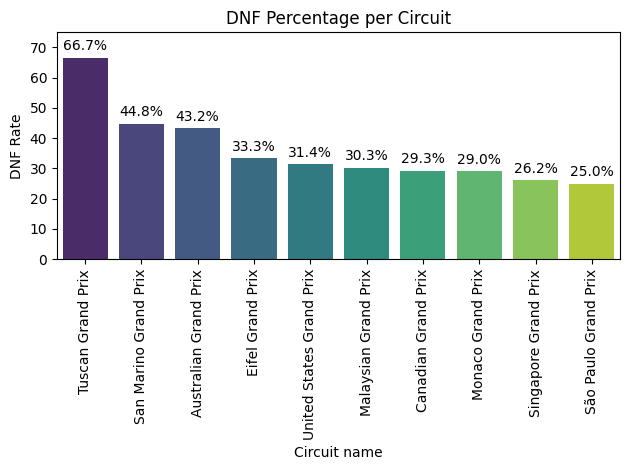

In [ ]:
ax = sns.barplot(data=top10_unpredictable,x='name',y='dnf_rate',palette='viridis')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)

plt.ylim(0, 75)

plt.title('DNF Percentage per Circuit')
plt.xlabel('Circuit name')
plt.ylabel('DNF Rate')
plt.savefig('../visuals/dnfs_per_circuits.png', dpi=300, bbox_inches='tight')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()